In [1]:
## Deprecated: Please check out classifier.ipynb

##### Create a classification model to predict the gender (male or female) based on different acoustic parameters

#### Importing the required modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Getting the data

In [4]:
data_df = pd.read_csv('./voice.csv')

#### 1. Remove/handle null values (if any)

In [5]:
data_df.isna()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3164,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3165,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3166,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data_df.isna().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

#### 2. Depict percentage distribution of '**label**' on a pie chart

In [7]:
# getting details about "label" in the given dataset
get_label = data_df['label']
# print(get_label)

In [8]:
# converting data(info) into a list by using type-conversion
get_label_list = list(data_df['label'])
# print(get_label_list)

In [20]:
# before constructing the pie-chart, we should check is our dataset is balanced or not
# in order to check if our dataset is balanced or not, we can use value_counts()
count = data_df['label'].value_counts()
print(count)

male      1584
female    1584
Name: label, dtype: int64


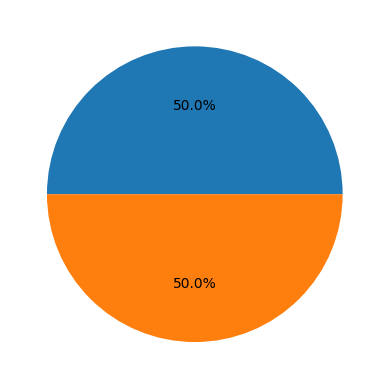

In [21]:
# as a result we can see our data is balanced (equally distributed)
# constructing a pie-chart about the data extracted from the column_name: 'label'
x = [1584, 1584]
plt.pie(x, data=get_label_list, autopct='%1.1f%%')
plt.show()

#### 3. Considering all the features as independent feature and label as dependent feature, split the dataset training and testing data with test size=20%

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [25]:
def get_voiceData():
    balance_data = pd.read_csv('./voice.csv')
      
    print ("Dataset Length: ", len(balance_data))
    print ("Dataset Shape: ", balance_data.shape)
      
    print ("Dataset: ",balance_data.head())
    return balance_data

get_voiceData()

Dataset Length:  3168
Dataset Shape:  (3168, 21)
Dataset:     meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   d

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [29]:
# spliting the data into test and traning set
def split_data_into_trainandtest(balance_data):
  
    # Separating the target variable
    X = balance_data.values[:, 1:5]
    Y = balance_data.values[:, 0]
  
    # Splitting the dataset into train and test
    X_train, X_test, y_train, y_test = train_test_split( 
    X, Y, test_size = 0.2, random_state = 100)
      
    return X, Y, X_train, X_test, y_train, y_test

In [31]:
def train(X_train, X_test, y_train):

    # Creating the classifier object
    ma_th = DecisionTreeClassifier(
        criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)

    # Performing training
    ma_th.fit(X_train, y_train)
    return ma_th


In [32]:
def prediction(X_test, ma_thOb):
  
    # Predicton on test with giniIndex
    y_pred = ma_thOb.predict(X_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [33]:
def accuracy_info(y_test, y_pred):
      
    print("Confusion Matrix: ",
        confusion_matrix(y_test, y_pred))
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred)*100)
      
    print("Report : ",
    classification_report(y_test, y_pred))

In [34]:
def main():
      
    dataset = get_voiceData()
    X, Y, X_train, X_test, y_train, y_test = split_data_into_trainandtest(dataset)
    calculate = train(X_train, X_test, y_train)

    print("results: ")
    y_prediction = prediction(X_test, calculate)
    accuracy_info(y_test, y_prediction)

if __name__ == '__main__':
    main()

Dataset Length:  3168
Dataset Shape:  (3168, 21)
Dataset:     meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   d

ValueError: Unknown label type: 'unknown'